In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


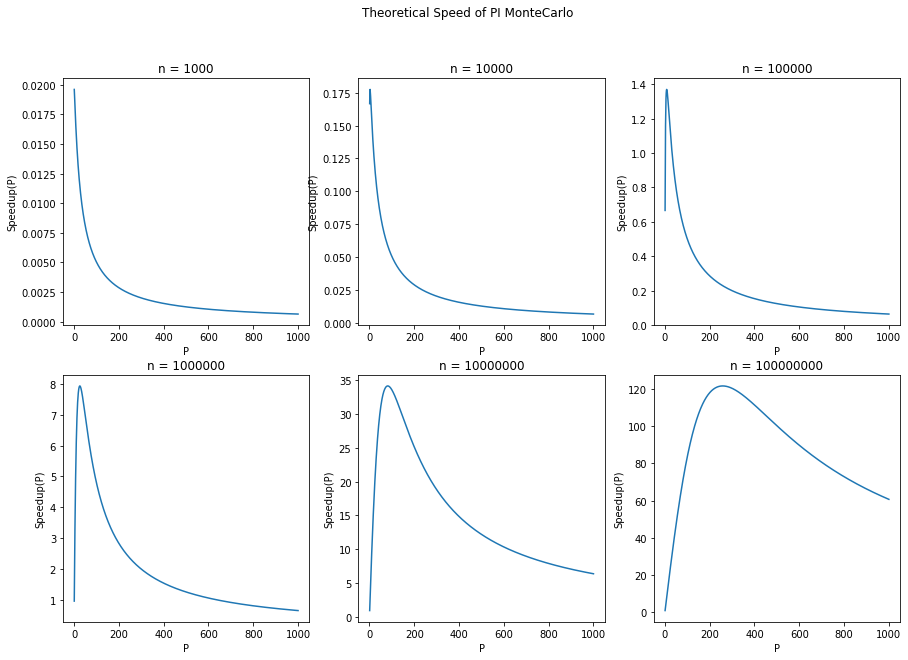

In [13]:
#Plotting theoretical speedup for serial sum parallel algorithm

P = linspace(1,1000,1000)
n = {3,4,5,6,7,8}
T_comp = 2*10e-9
T_read = 10e-4
T_comm = 1.5*10e-6

def Speedup(x,r,T_comp,T_read,T_comm):
    T_P = T_read + T_comm * 2 * (x - 1) + T_comp * (1 + r/x)
    T_1 = r * T_comp
    return T_1/T_P

fh = figure(figsize=(15,10))
fh.suptitle("Theoretical Speed of PI MonteCarlo")
for i in n:
    ax = fh.add_subplot(2,3,i-2)
    ax.set_title("n = " + str(10**i))
    ax.set_xlabel("P")
    ax.set_ylabel("Speedup(P)")
    plot(P,Speedup(P,10**i,T_comp,T_read,T_comm))
    
fh.savefig("foo.png")

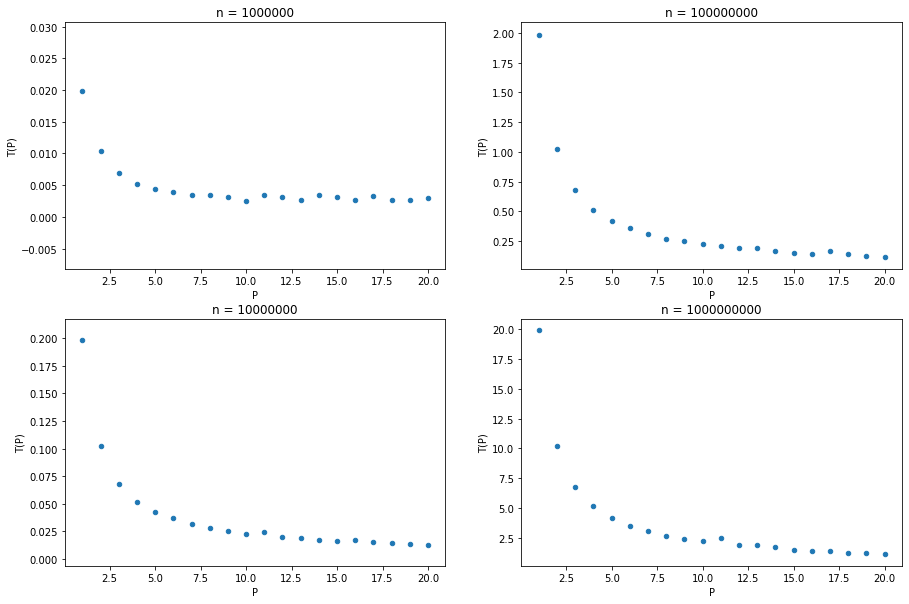

<Figure size 1080x720 with 0 Axes>

In [29]:
#Strong scaling plots
import pandas

df = pandas.read_csv('mpi-pi.csv',
                     delimiter=";",
                     float_precision='round_trip',
                    names=['Rank', 'P', 'T(P)','N'])

#print(df)
#We extract the maximum walltime for every P for a fixed N
idx = df.groupby(['N','P'])['T(P)'].transform(max) == df['T(P)']
strong_df = df[idx]

#print(strong_df)


counter = 0
fh, axes = subplots(nrows=2, ncols=2)
fh = figure(figsize=(15,10))
fh.suptitle("Strong Scaling")
for i in strong_df.N.unique():
    #ax = fh.add_subplot(2,2,counter)
    k_df = strong_df.loc[strong_df['N'] == i]
    k_df = k_df.astype(float)
    k_df.plot(figsize=(15,10), x = 'P', y = 'T(P)', kind='scatter', title="n = " + str(i), ax=axes[counter%2, counter//2])
    counter += 1
    
    #plt = k_df.plot(x = 'P', y = 'T(P)', kind='scatter', title="n = " + str(i))
    #counter += 1
    #savefig("plt.pdf")
#savefig("plt.png")


In [12]:
#Parallel overhead estimation for 1 processor, different values of n
usr_serial = np.array([0.003,0.021,0.197,1.966,19.665])
usr_paral = np.array([1.147,1.172,1.342,3.124,21.011])
usr_diff = usr_paral - usr_serial

usr_diff
mean(usr_diff)


1.1888

[0.      0.0019  0.      0.02098 0.      0.06724 0.      0.33784 0.
 0.00406 0.      0.51522 0.      0.      0.      0.144   0.      1.20497
 0.06008]
[0.      0.00191 0.      0.00619 0.08702 0.07725 0.20385 0.09298 0.
 0.05602 0.      0.      0.      0.      0.      0.17094 0.      0.
 0.     ]
[0.      0.00286 0.      0.00406 0.01502 0.06485 0.      0.      0.0372
 0.      0.      0.      0.      0.      0.      0.      0.      0.19908
 0.     ]
[0.      0.      0.      0.0019  0.07105 0.      0.      0.      0.
 0.      0.      0.      0.15378 1.22309 0.67091 0.00191 0.      0.
 1.08767]


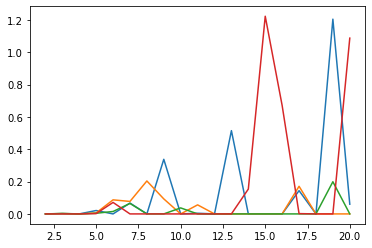

In [47]:
#Parallel overhead plots: still have more than one doubt

df = pandas.read_csv('mpi-pi.csv_out',
                     delimiter=";",
                     float_precision='round_trip',
                    names=['Rank', 'P', 'T(P)','N'])

#print(df)

#We extract the maximum walltime for every P for a fixed N
idx = df.groupby(['N','P'])['T(P)'].transform(max) == df['T(P)']
strong_df = df[idx]
strong_df = strong_df.loc[strong_df['P'] != 1]
#print(strong_df)

#We also extract the walltime of the master for a fixed N
master_df = df.loc[df['Rank'] == 0]
#print(master_df)

for i in strong_df.N.unique():
    k_strong_df = strong_df.loc[strong_df['N'] == i]
    k_master_df = master_df.loc[master_df['N'] == i]
    k_strong_df = k_strong_df[['P','T(P)']].drop_duplicates()
    k_master_df = k_master_df[['P','T(P)']].drop_duplicates()
    k_strong_ar = k_strong_df['T(P)'].values
    k_master_ar = k_master_df['T(P)'].values
    k_diff = k_strong_ar - k_master_ar
    procs = linspace(2,20,19)
    print(k_diff)
    plot(procs, k_diff)


